# FORMATIVE ASSIGNMENT II: WATER QUALITY MODEL

## 1. Introduction
**Assignment**: Building a Classification Model Using Neural Networks

**Objective:**
Develop a neural network-based classification model using a provided dataset, incorporating multiple optimization techniques and ensuring equitable group contribution.

## 2. Data Preprocessing
This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fuom190346a%2Fwater-quality-and-potability%3Fselect%3Dwater_potability.csv

### 2.1 Data Exploration


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define path to the dataset file
file_path = "../data/water_potability_data.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Display the first few rows of the DataFrame
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
print("\nDataFrame information (data types, non-null counts):")
df.info()

print("\nSummary statistics of the dataset:")
df.describe()


DataFrame information (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Summary statistics of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [9]:
print("\nDistribution of the target variable (Potability):")
print(df['Potability'].value_counts())
print("\nDistribution of the target variable (Potability) in percentage:")
print(df['Potability'].value_counts(normalize=True) * 100)


Distribution of the target variable (Potability):
Potability
0    1998
1    1278
Name: count, dtype: int64

Distribution of the target variable (Potability) in percentage:
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


The percentage distribution (e.g., 0: 60.99%, 1: 39.01%) reveals the balance between potable and non-potable water samples in the dataset.
This dataset is somewhat imbalanced, with more non-potable samples than potable ones. 

### 2.2 Data Visualization
**Visualize Feature Distributions (Histograms)**

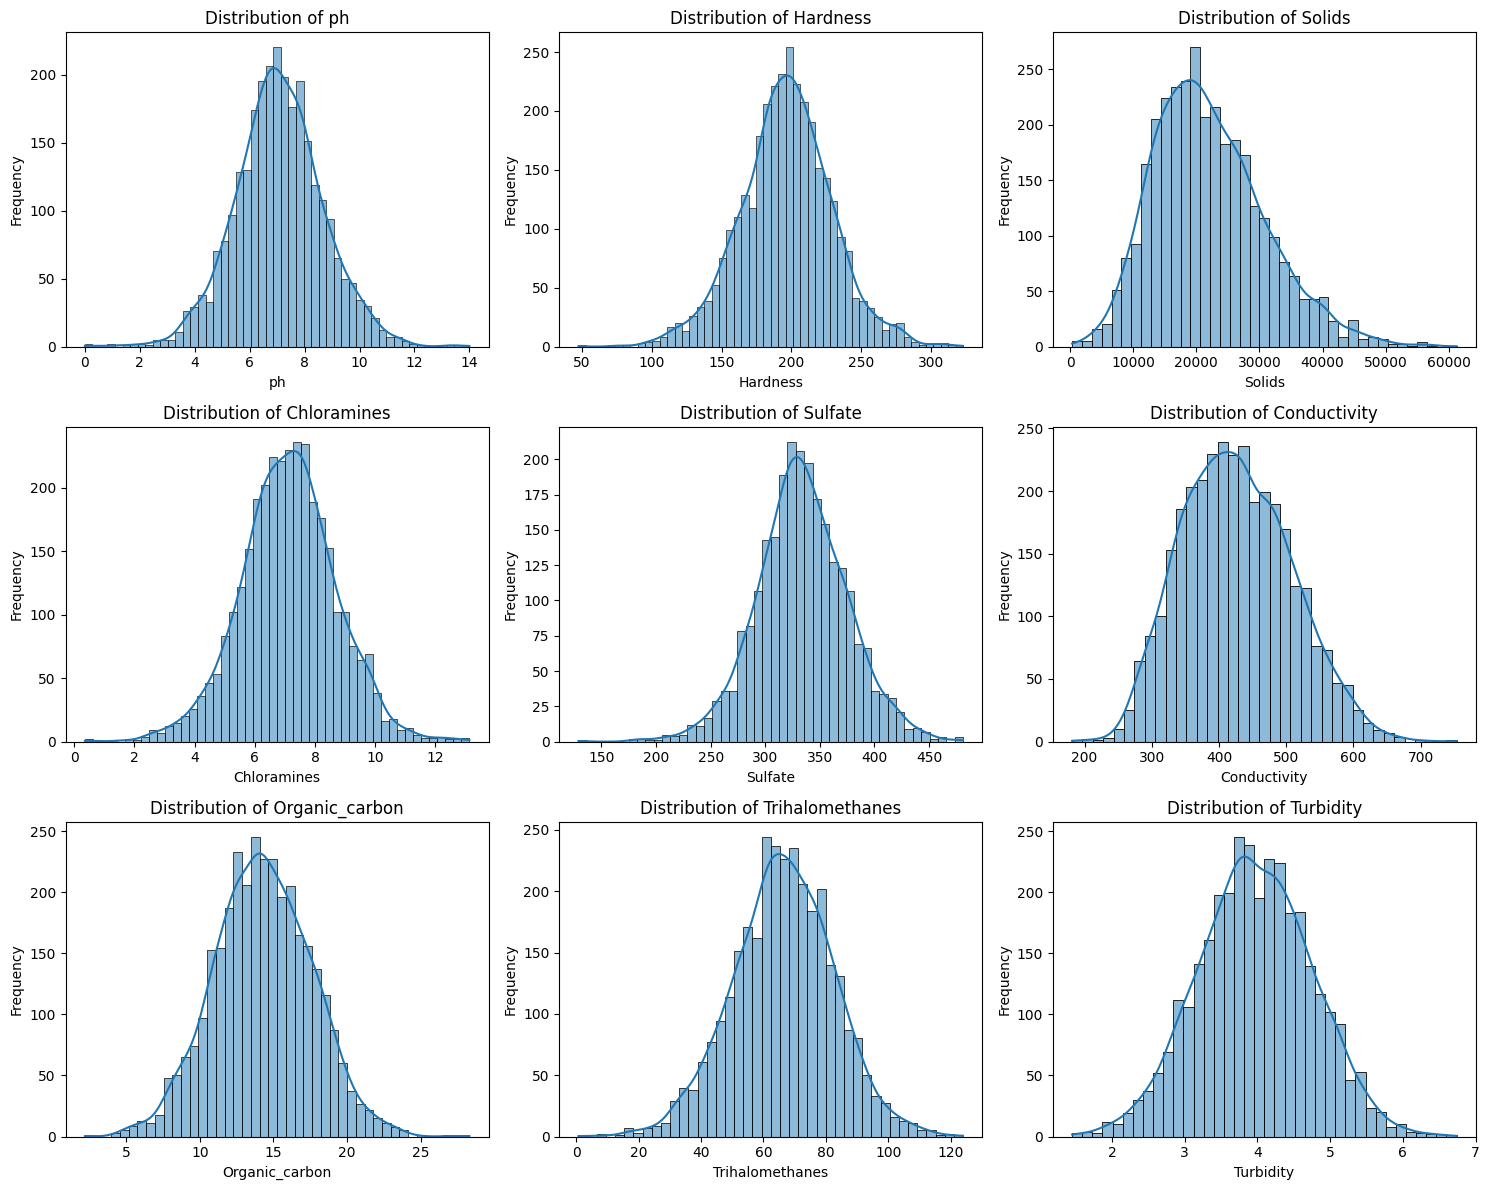

In [16]:
# Select numerical columns for plotting (excluding Potability for now)
feature_columns = df.drop(columns=['Potability'], errors='ignore').columns

# Determine the number of rows and columns for the subplot grid
n_features = len(feature_columns)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(feature_columns):
    if pd.api.types.is_numeric_dtype(df[column]): # Check if column is numeric
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[column], kde=True) # kde=True adds a density curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        print(f"Skipping non-numeric column: {column}")

plt.tight_layout()

plt.show()


**Visualize Feature Correlations (Heatmap)**

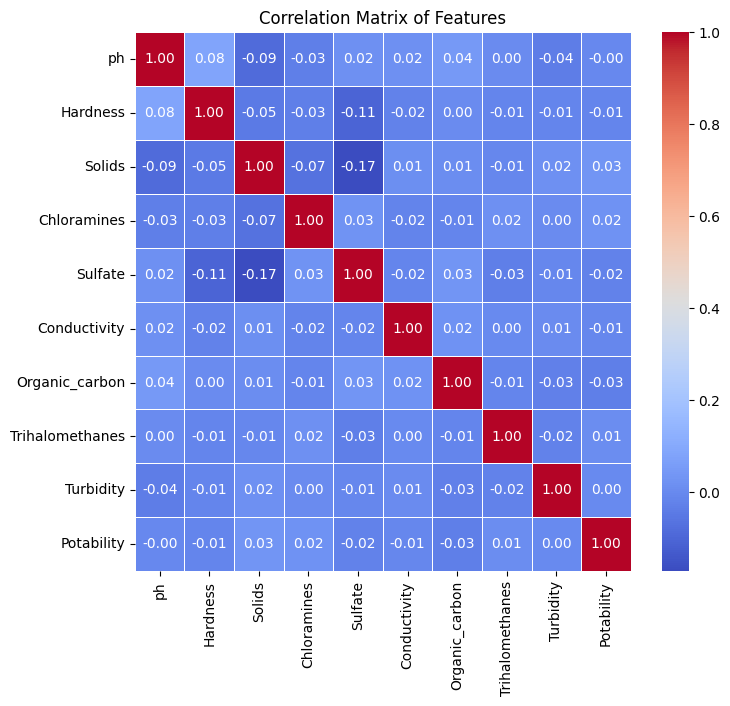

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Features')
plt.show()